In [27]:
#pip install --upgrade scikit-learn imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/11.1 MB 10.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.1 MB 16.3 MB/s eta 0:00:01
   ------- -------------------------------- 2.2/11.1 MB 17.2 MB/s eta 0:00:01
   ---------- ----------------------------- 2.8/11.1 MB 18.1 MB/s eta 0:00:01
   ---------- ----------------------------- 2.8/11.1 MB 18.1 MB/s eta 0:00:01
   ---------- ----------------------------- 2.8/11.1 MB 18.1 MB/s eta 0:00:01
   ----------- ---------------------------- 3.2/11.1 MB 11.4 MB/s eta 0:00:01
   ---------------- ----------------------- 4.7/11.1 MB 13.1 MB/s eta 0:00:01
   ------------------ --------------------- 5.1/11.1 MB 12.9 MB/s eta 0:00:01
   ------------------- -------------------- 5.4/11.1 MB 11.8 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.1 MB 11.6 MB/s eta 0:

  You can safely remove it manually.


In [1]:
#import
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [2]:
#read data
df=pd.read_excel(r"C:\Users\Hxtreme\Jupyter_Notebook_Learning\Project3_V2\Dataset\kidney_data.xlsx")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
#describe
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [5]:
#null values
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
#duplicates
duplicates=df[df.duplicated()]
duplicates

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


In [7]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [3]:
kidney_df=df
kidney_df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
#column rename
kidney_df.columns = ['id','age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'status']

In [10]:
kidney_df

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,status
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [5]:
#drop ID
kidney_df.drop('id',axis=1, inplace=True)

In [12]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [6]:
#convert to numeric
kidney_df['packed_cell_volume'] = pd.to_numeric(kidney_df['packed_cell_volume'], errors='coerce')
kidney_df['white_blood_cell_count'] = pd.to_numeric(kidney_df['white_blood_cell_count'], errors='coerce')
kidney_df['red_blood_cell_count'] = pd.to_numeric(kidney_df['red_blood_cell_count'], errors='coerce')

In [7]:
#target
kidney_df['status'].value_counts()

status
ckd       250
notckd    150
Name: count, dtype: int64

In [8]:
#fill numeric missing values
def random_value_imputation(feature):
    non_na_values = kidney_df[feature].dropna()
    if non_na_values.empty:
        print(f"Skipping column '{feature}' as it has no available data to sample from.")
        return
    random_sample = non_na_values.sample(kidney_df[feature].isna().sum(), replace=True)
    random_sample.index = kidney_df[kidney_df[feature].isnull()].index
    kidney_df.loc[kidney_df[feature].isnull(), feature] = random_sample

In [9]:
#fill categoric missing values
def impute_mode(feature):
    mode = kidney_df[feature].mode()[0]
    kidney_df[feature] = kidney_df[feature].fillna(mode)

In [10]:
#split numeric/categoric columns
cat_col = [col for col in kidney_df.columns if kidney_df[col].dtype == 'object']
num_col = [col for col in kidney_df.columns if kidney_df[col].dtype != 'object']

In [11]:
#fill num_col for missing values
for col in num_col:
    random_value_imputation(col)

In [19]:
kidney_df[num_col].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [20]:
kidney_df[cat_col].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
status                       0
dtype: int64

In [12]:
#fill rbc/pc
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

In [13]:
#fill other cat cols
for col in cat_col:
    impute_mode(col)

In [15]:
#numeric unique values
for col in num_col:
    print(f"{col} has {kidney_df[col].unique()}")

age has [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26. 64.
  6. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25. 20.
 29. 28. 22. 79.]
blood_pressure has [ 80.  50.  70.  90. 100.  60. 110. 140. 180. 120.]
specific_gravity has [1.02  1.01  1.005 1.015 1.025]
albumin has [1. 4. 2. 3. 0. 5.]
sugar has [0. 3. 4. 1. 2. 5.]
blood_glucose_random has [121. 288. 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 132. 204. 108. 156. 264. 123.  81.
  93. 107. 159. 140. 171. 270.  92. 137.  96.  79. 207. 124. 144.  91.
 162. 246.  78. 160. 131. 253. 165. 141. 182.  86. 150. 146. 425. 112.
 250. 360. 163. 129. 133. 102. 158. 104. 127. 148. 415. 169. 251. 109.
 280. 210. 219. 295.  94. 172. 101. 298. 153.  88. 226. 143. 115.  89.
 297. 233. 294. 111.  97.  80. 323. 125.  90.

In [24]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    object 
 6   pus_cell                 400 non-null    object 
 7   pus_cell_clumps          400 non-null    object 
 8   bacteria                 400 non-null    object 
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


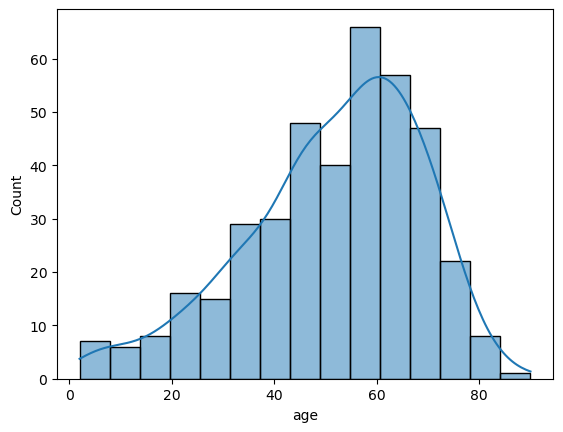

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


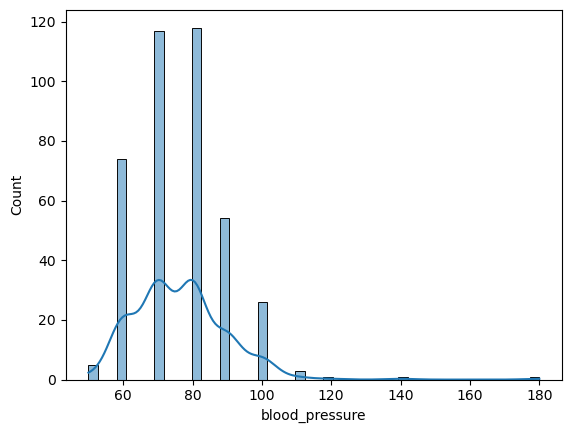

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


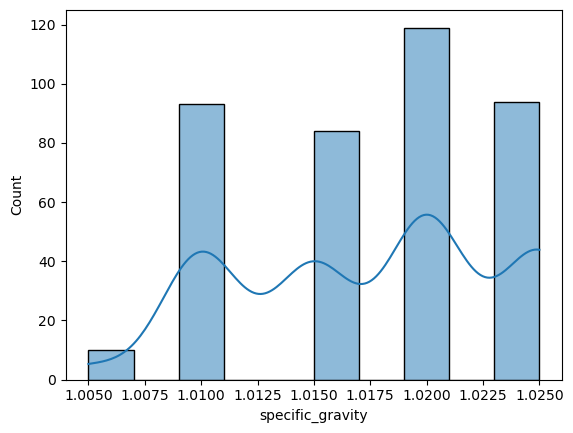

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


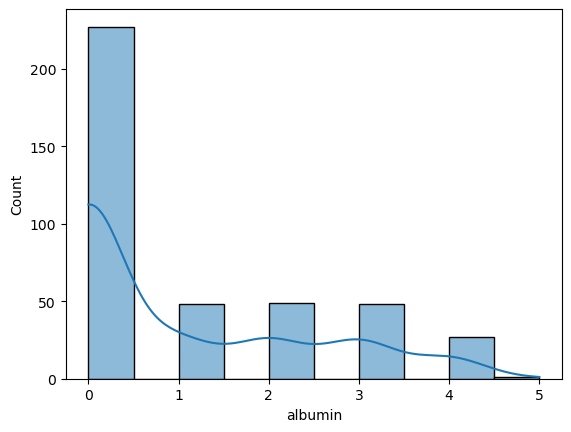

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


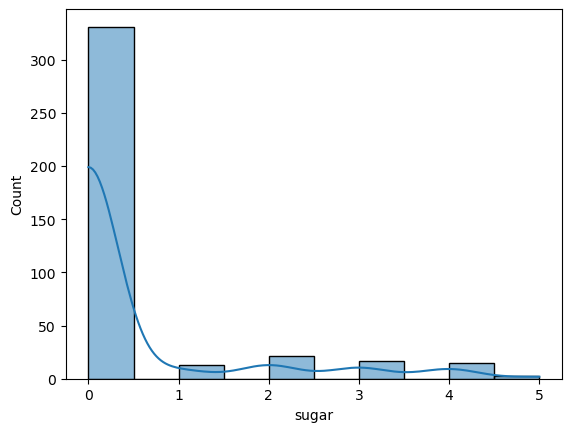

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


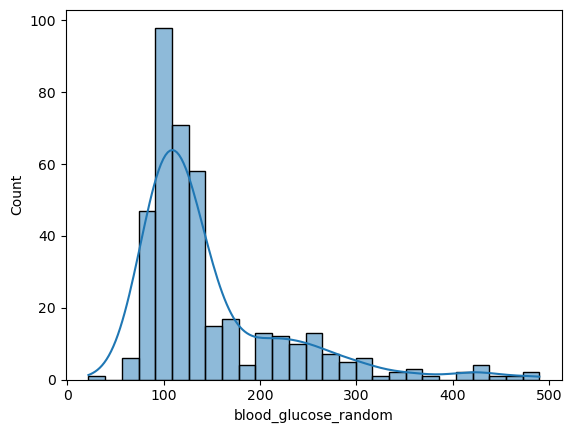

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


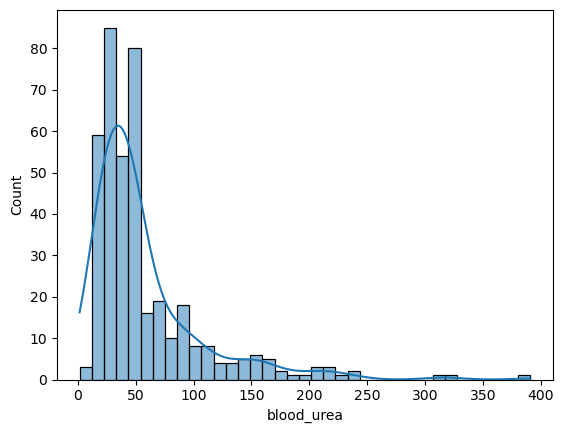

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


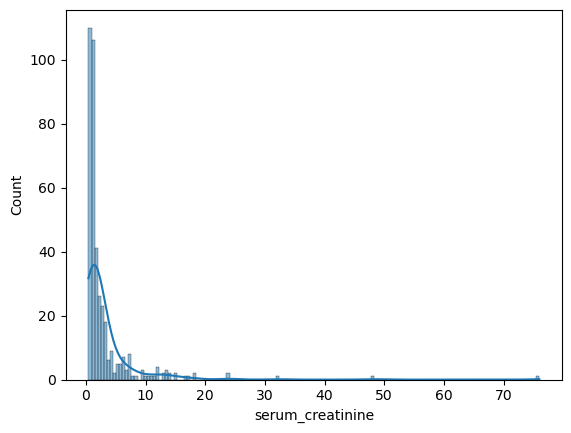

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


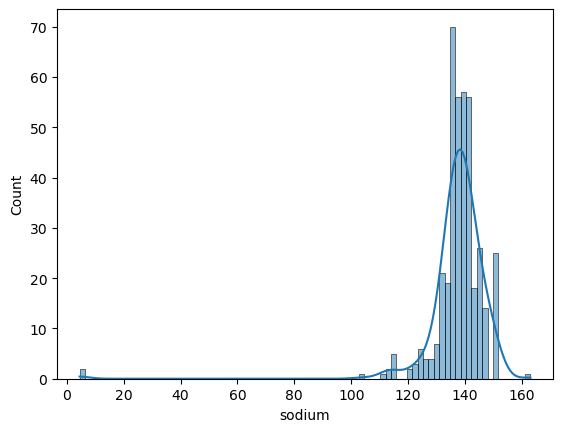

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


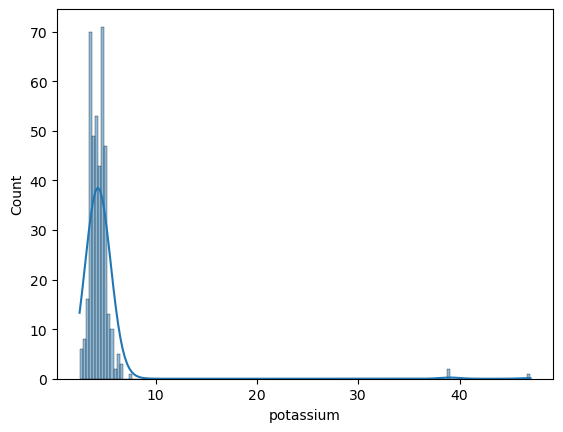

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


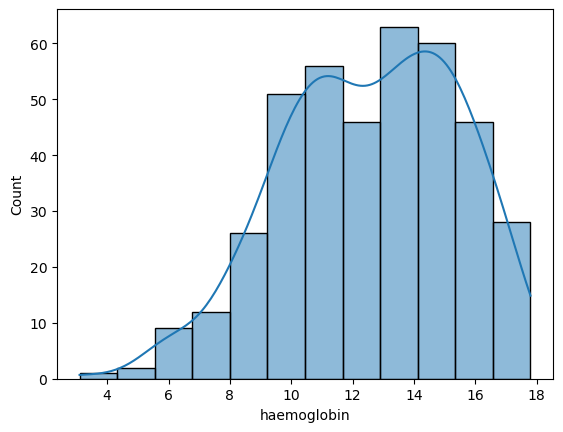

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


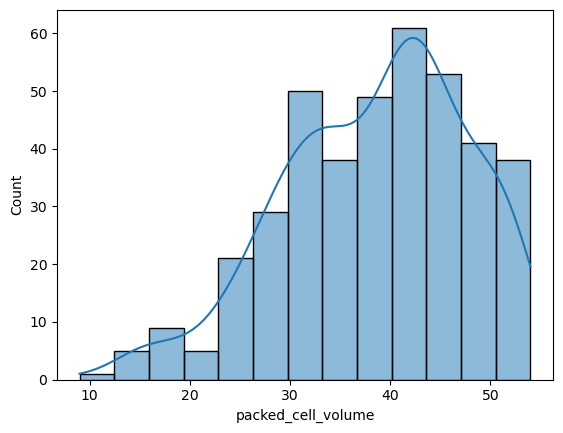

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


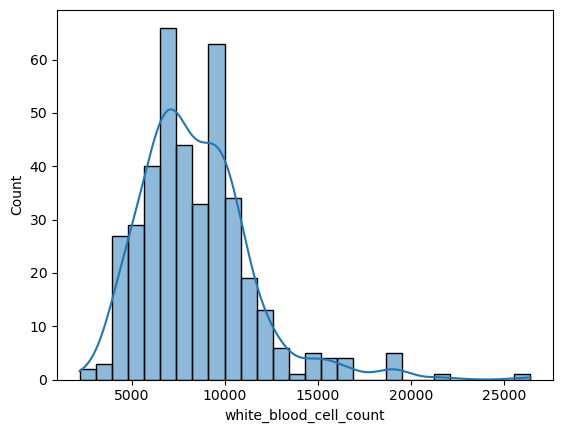

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


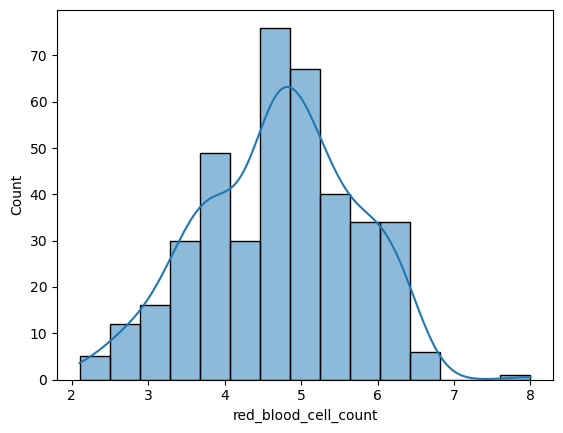

In [25]:
#EDA
#univariate_numeric
for col in num_col:
    sb.histplot(data=kidney_df,x=col,kde=True)
    plt.show()

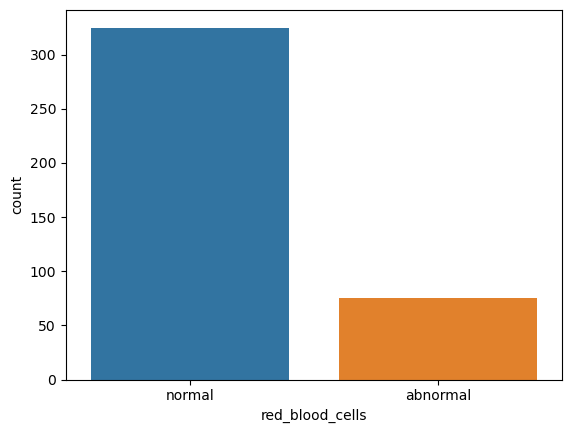

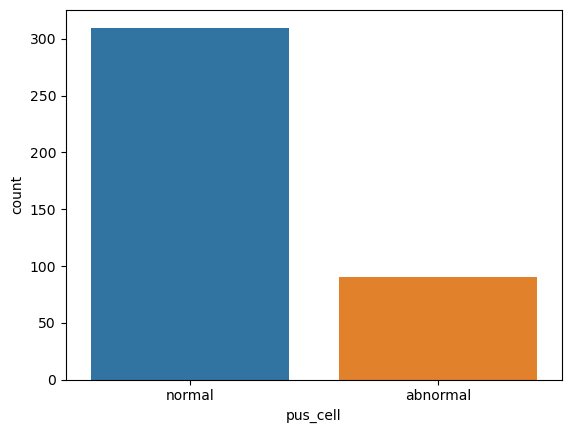

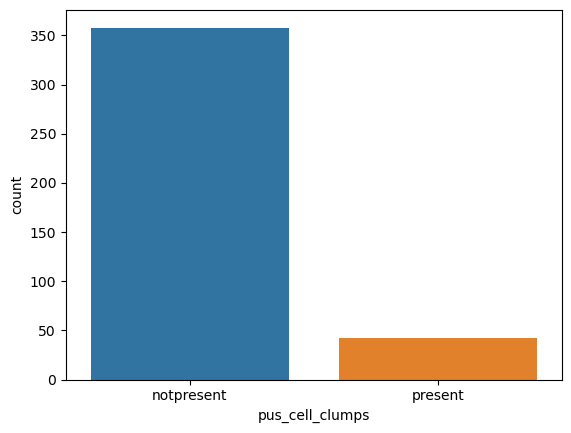

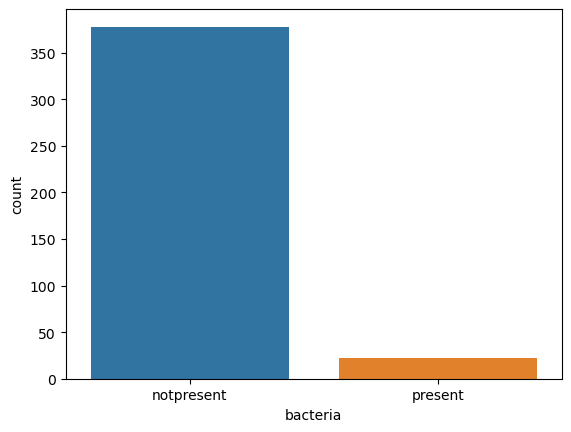

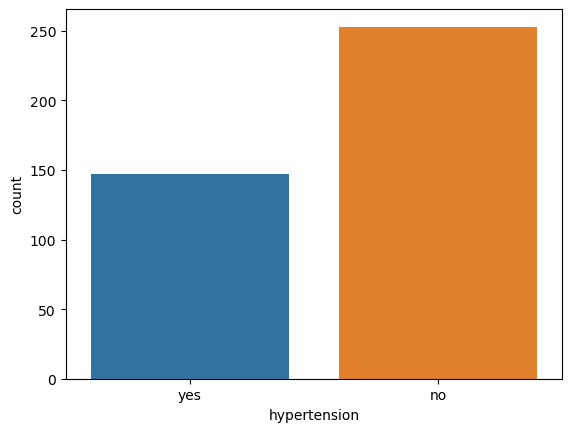

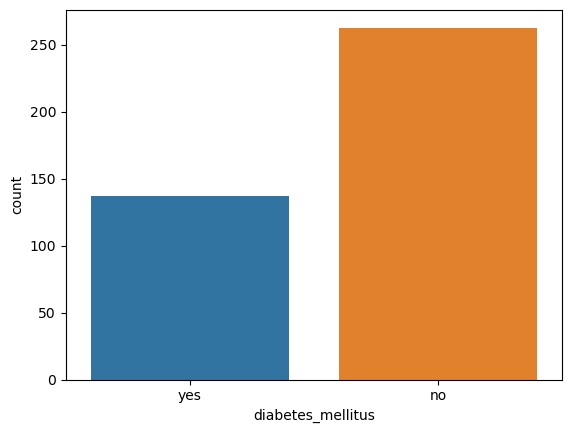

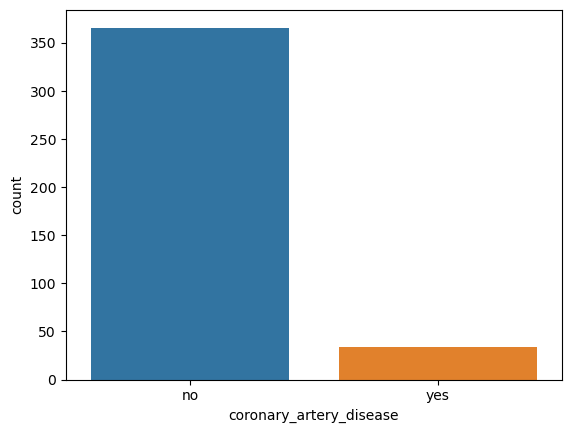

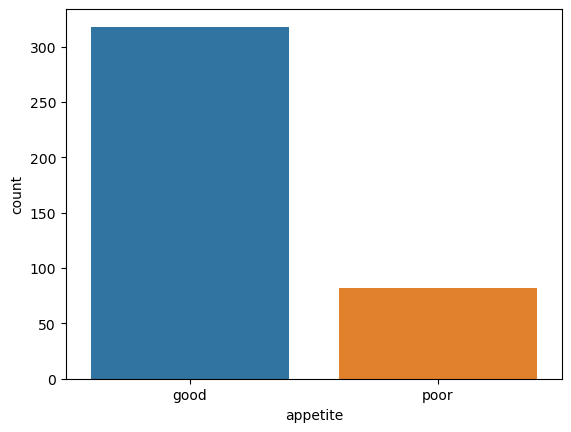

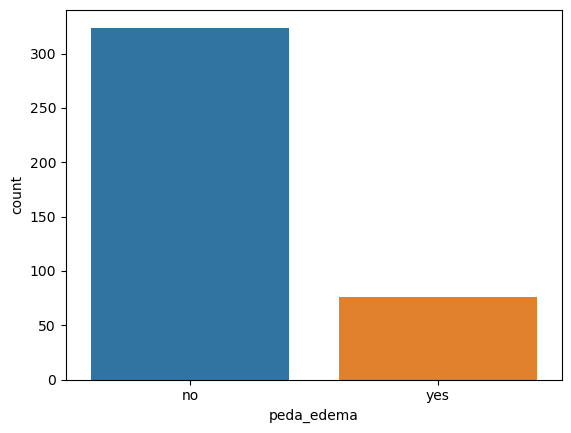

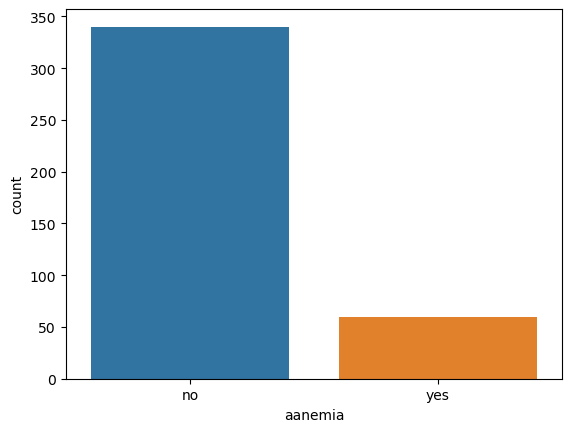

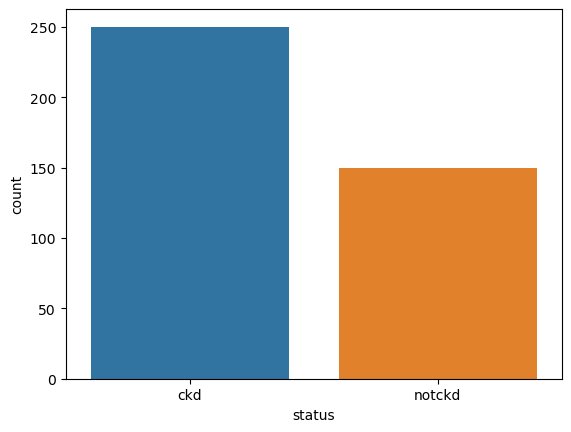

In [26]:
#EDA
#univariate_categoric
for col in cat_col:
    sb.countplot(data=kidney_df,x=col)
    plt.show()

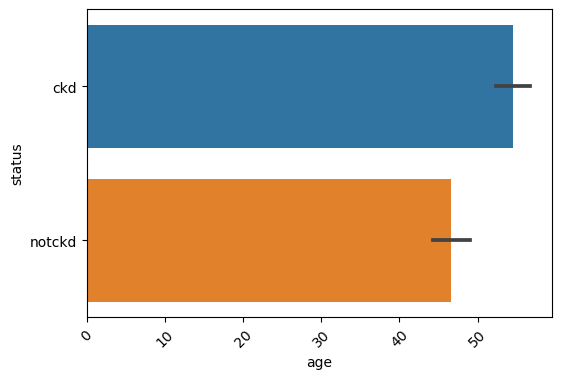

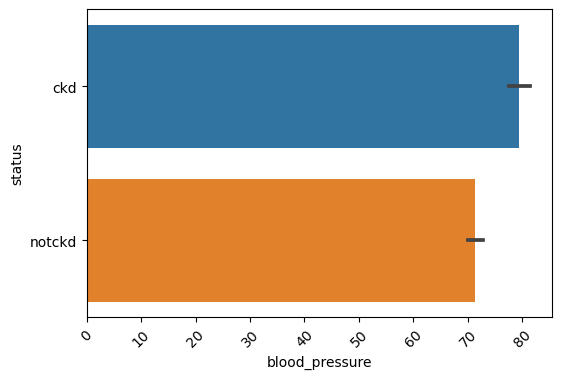

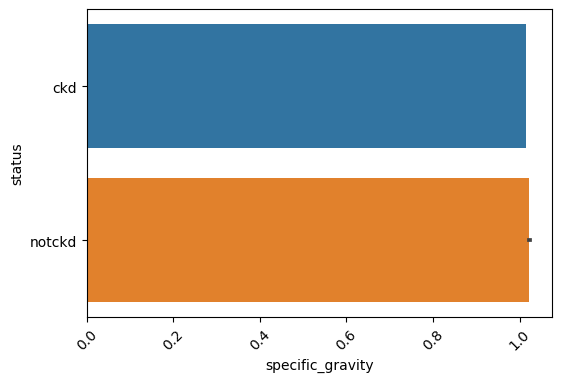

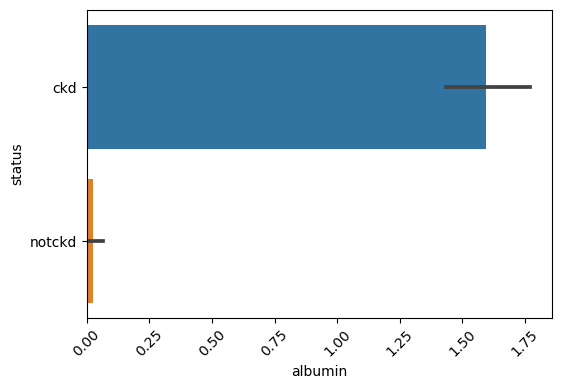

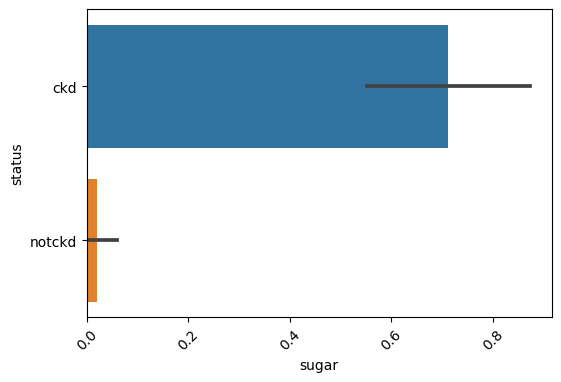

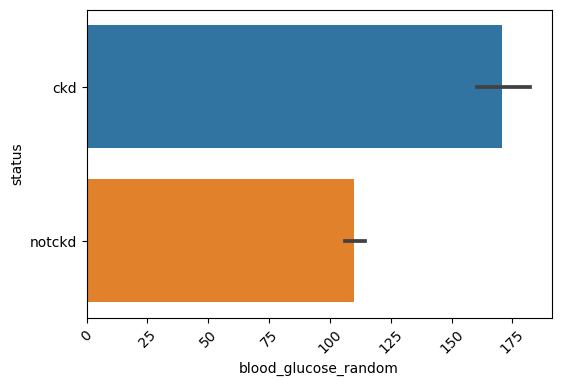

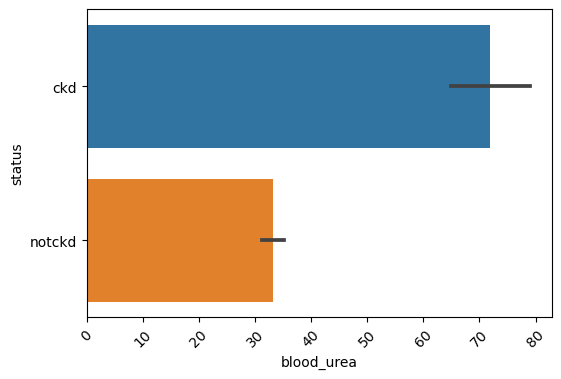

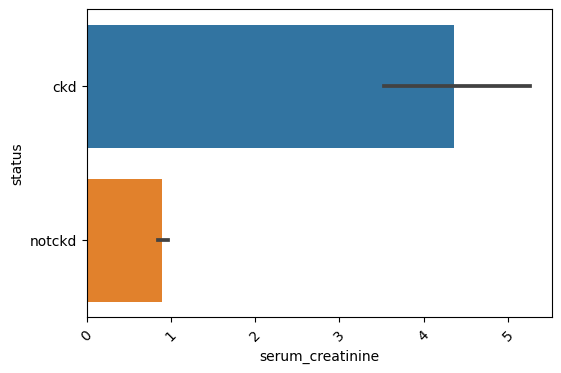

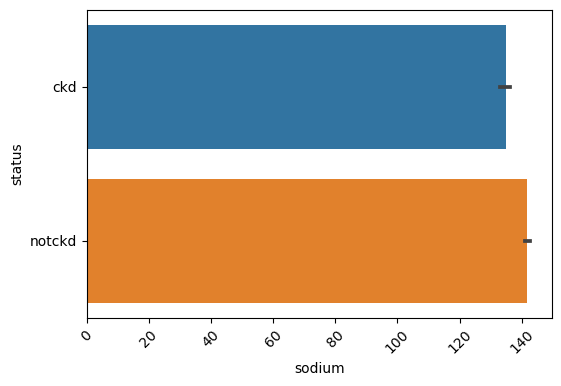

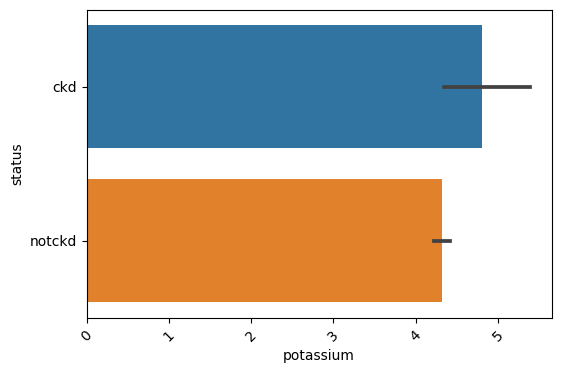

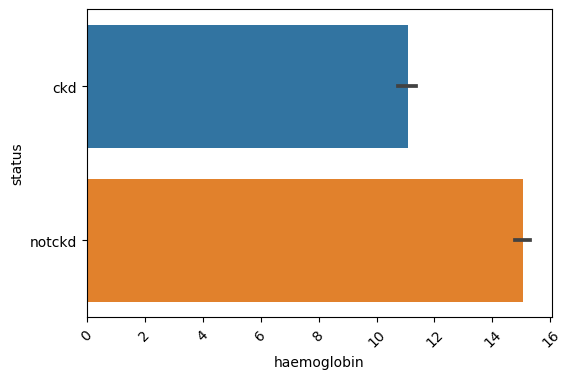

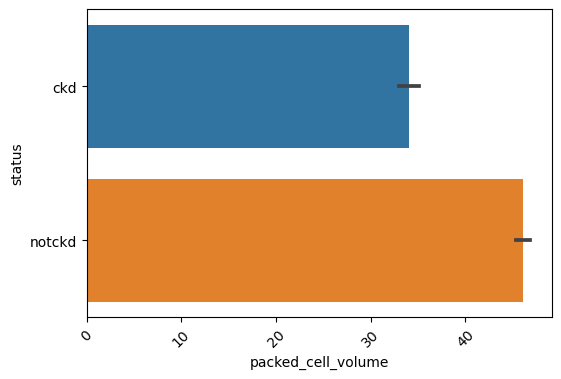

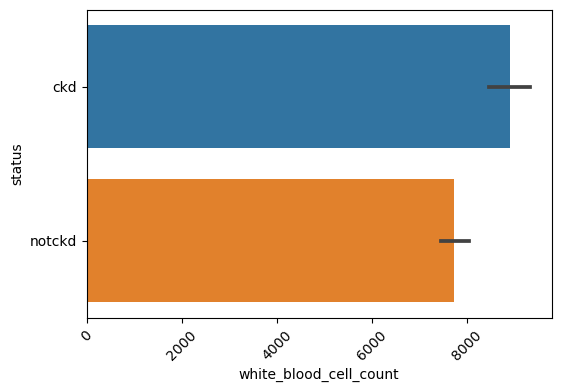

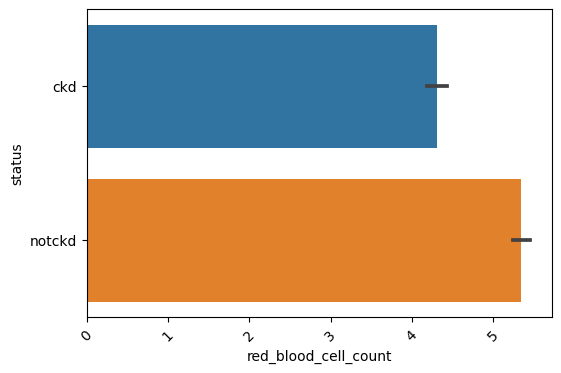

In [27]:
#bivariate
#numeric Vs categoric
for col in num_col: 
    plt.figure(figsize=(6, 4))
    sb.barplot(data=kidney_df, x=col,y='status')
    plt.xticks(rotation=45)
    plt.show()

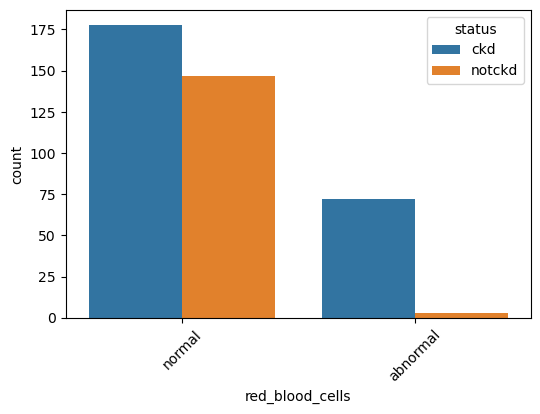

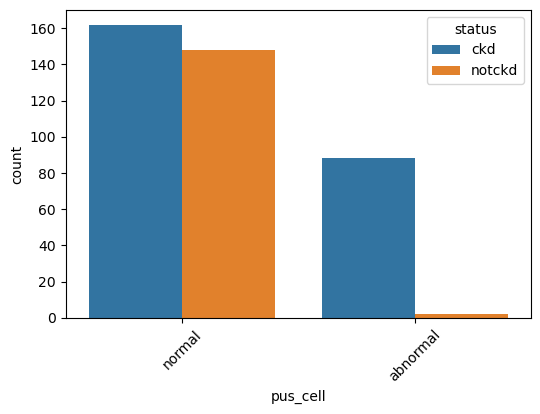

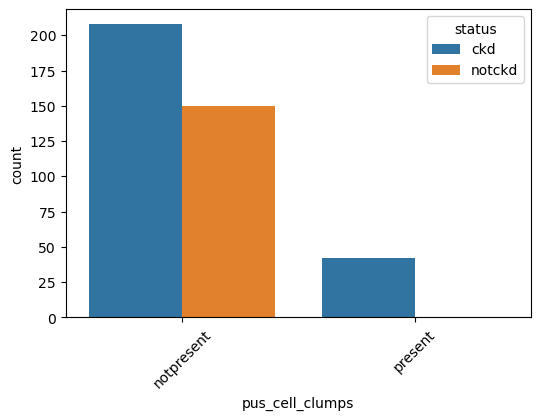

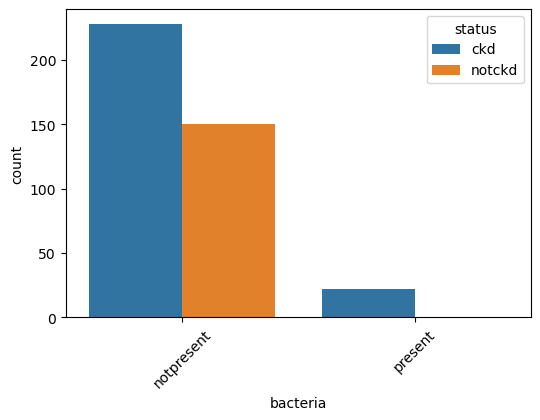

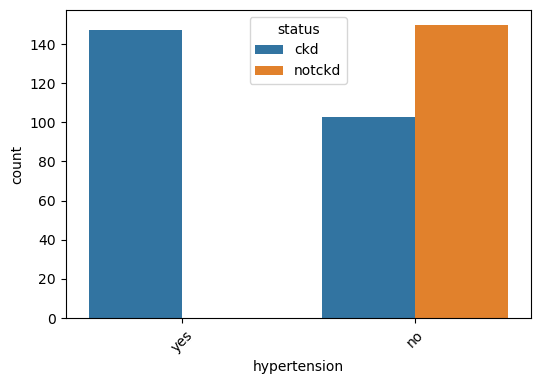

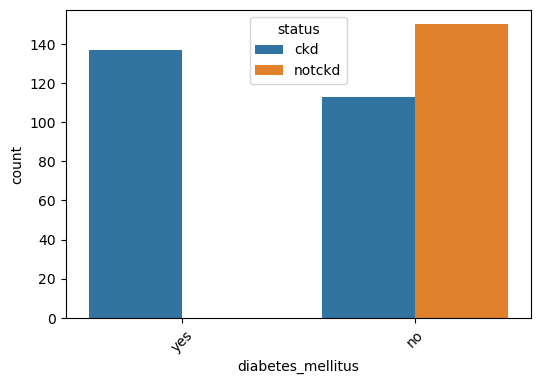

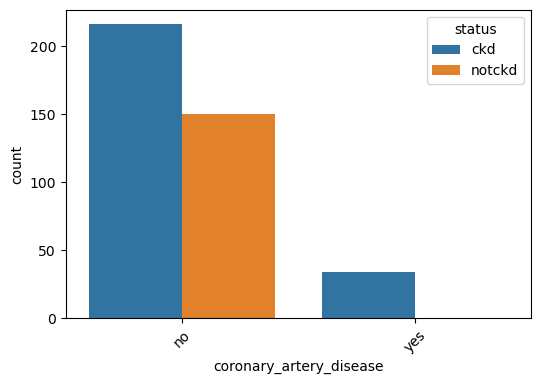

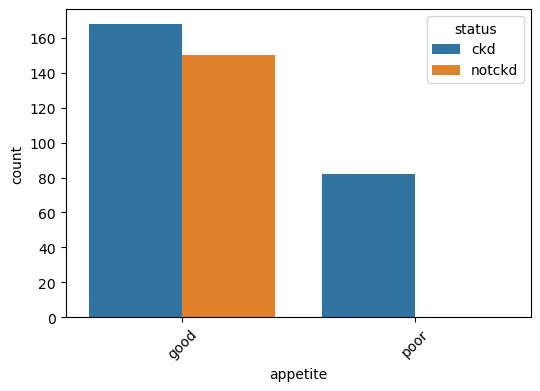

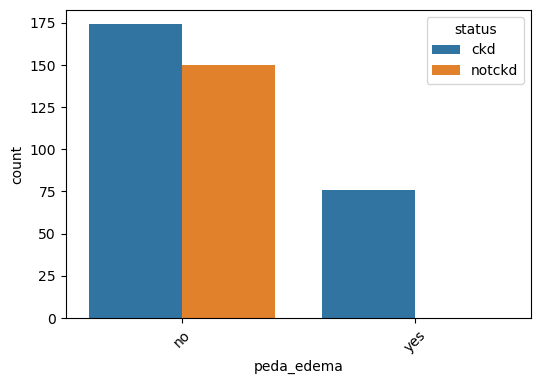

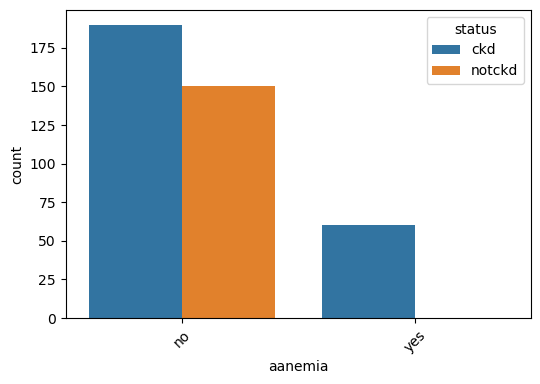

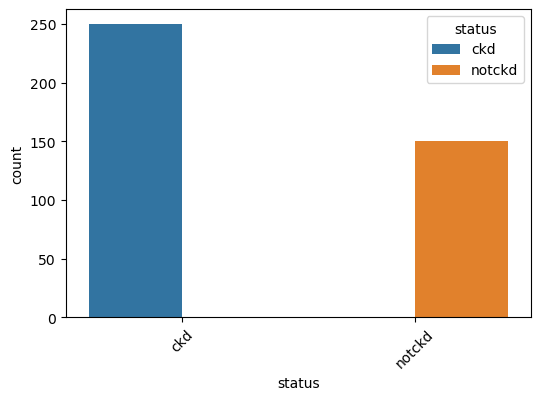

In [28]:
#categoric Vs categorical
for col in cat_col: 
    plt.figure(figsize=(6, 4))
    sb.countplot(data=df, x=col,hue='status')
    plt.xticks(rotation=45)
    plt.show()

In [14]:
#encoding
#status to numeric
kidney_df['status'] = kidney_df['status'].map({'ckd': 1, 'notckd': 0})
kidney_df['status'] = pd.to_numeric(kidney_df['status'], errors='coerce')

In [15]:
#categoric unique values
for col in cat_col:
    print(f"{col} has {kidney_df[col].nunique()}")

red_blood_cells has 2
pus_cell has 2
pus_cell_clumps has 2
bacteria has 2
hypertension has 2
diabetes_mellitus has 2
coronary_artery_disease has 2
appetite has 2
peda_edema has 2
aanemia has 2
status has 2


In [16]:
#label encoding for all cat cols
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [32]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    int32  
 6   pus_cell                 400 non-null    int32  
 7   pus_cell_clumps          400 non-null    int32  
 8   bacteria                 400 non-null    int32  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [33]:
#multivariate
kidney_df.corr()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,status
age,1.000000,0.167825,-0.176687,0.120589,0.193549,-0.026375,-0.120672,0.156755,0.042427,0.215732,...,-0.169256,0.090940,-0.194800,0.399411,0.364887,0.230236,0.157947,0.103293,0.064969,0.225116
blood_pressure,0.167825,1.000000,-0.128137,0.130791,0.196384,-0.203042,-0.152156,0.061206,0.112485,0.149897,...,-0.231733,0.000592,-0.153927,0.275134,0.234575,0.087677,0.176024,0.035316,0.188861,0.282858
specific_gravity,-0.176687,-0.128137,1.000000,-0.398798,-0.224044,0.240471,0.278012,-0.270845,-0.205683,-0.325253,...,0.464191,-0.195649,0.326428,-0.306525,-0.348584,-0.158986,-0.181012,-0.236412,-0.206650,-0.649227
albumin,0.120589,0.130791,-0.398798,1.000000,0.232260,-0.325156,-0.441089,0.379199,0.348426,0.295983,...,-0.409649,0.164151,-0.394927,0.457323,0.355502,0.217738,0.341692,0.403832,0.267721,0.563560
sugar,0.193549,0.196384,-0.224044,0.232260,1.000000,-0.099445,-0.213957,0.140957,0.100232,0.602048,...,-0.191880,0.165254,-0.168700,0.294817,0.441060,0.225257,0.078298,0.102116,0.069124,0.304842
red_blood_cells,-0.026375,-0.203042,0.240471,-0.325156,-0.099445,1.000000,0.262673,-0.086188,-0.108868,-0.196372,...,0.234220,-0.009904,0.184297,-0.151950,-0.139192,-0.083256,-0.216174,-0.191843,-0.103143,-0.332413
pus_cell,-0.120672,-0.152156,0.278012,-0.441089,-0.213957,0.262673,1.000000,-0.459920,-0.290177,-0.267690,...,0.378407,-0.086475,0.343836,-0.321927,-0.254527,-0.222187,-0.260264,-0.318952,-0.243114,-0.392632
pus_cell_clumps,0.156755,0.061206,-0.270845,0.379199,0.140957,-0.086188,-0.459920,1.000000,0.275082,0.183246,...,-0.241198,0.158915,-0.297755,0.195623,0.165236,0.188029,0.189688,0.104356,0.175861,0.265313
bacteria,0.042427,0.112485,-0.205683,0.348426,0.100232,-0.108868,-0.290177,0.275082,1.000000,0.096883,...,-0.156279,0.070438,-0.136689,0.089046,0.080070,0.162395,0.149126,0.134732,0.052208,0.186871
blood_glucose_random,0.215732,0.149897,-0.325253,0.295983,0.602048,-0.196372,-0.267690,0.183246,0.096883,1.000000,...,-0.228204,0.098414,-0.199229,0.364550,0.468278,0.211944,0.175851,0.082049,0.137497,0.377914


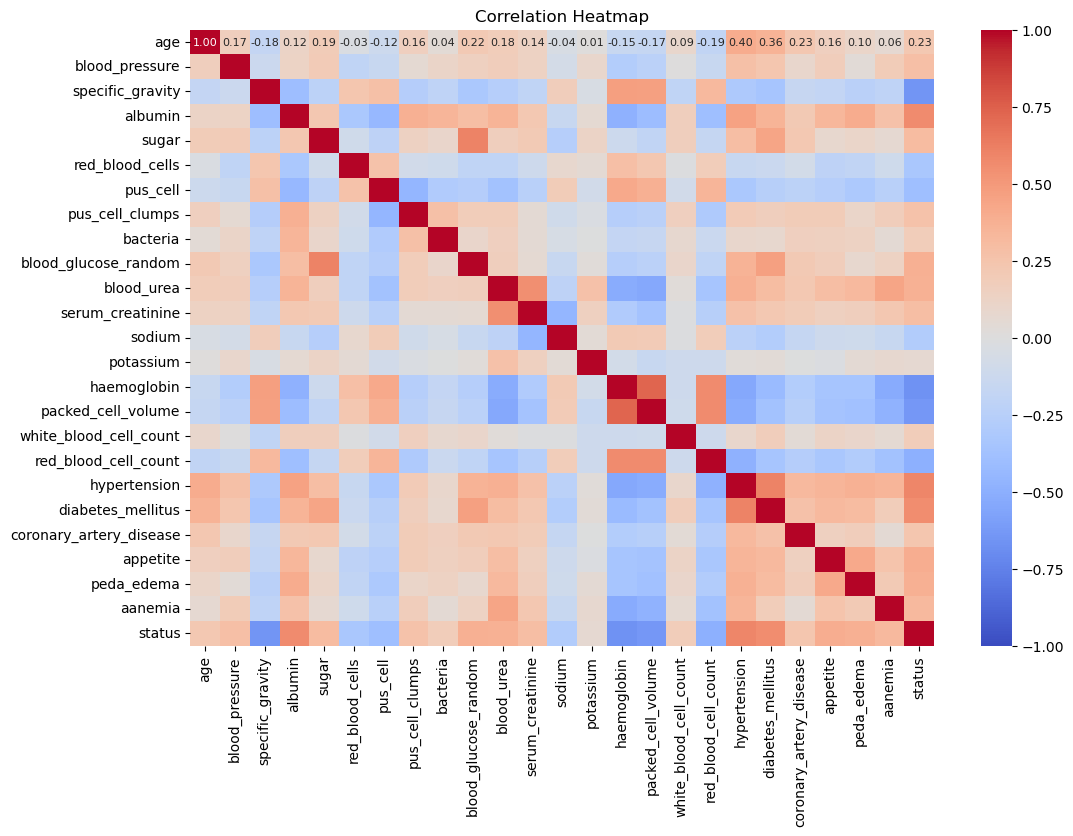

In [34]:
plt.figure(figsize=(12,8)) 
sb.heatmap(kidney_df.corr(), cmap="coolwarm", annot=True, fmt=".2f", annot_kws={"size": 8}, vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [35]:
#Feature Selection

In [276]:
    x = kidney_df_smote.drop(columns=['status'])
    y = kidney_df_smote['status']

In [277]:
#split data to train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 2)

In [278]:
#RFC

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [279]:
# Get feature importance
rf_importances = rfc.feature_importances_

In [280]:
# Convert to DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': rf_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

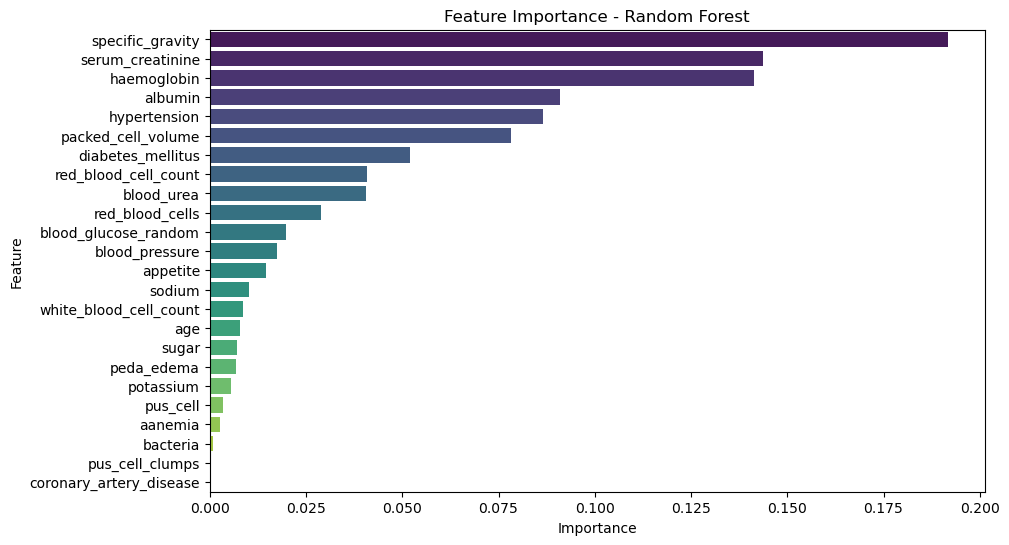

In [281]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sb.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.show()

In [23]:
kidney_df['status'].value_counts()

status
1    250
0    150
Name: count, dtype: int64

In [24]:
sx_ = kidney_df.drop(columns=['status'])
sy_ = kidney_df['status']

In [25]:
#SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_osampled, y_osampled = smote.fit_resample(sx_, sy_)

In [26]:
kidney_df_smote = pd.DataFrame(x_osampled, columns=sx_.columns)
kidney_df_smote['status'] = y_osampled

In [27]:
print(kidney_df_smote['status'].value_counts())

status
1    250
0    250
Name: count, dtype: int64


In [283]:
X1 = kidney_df_smote[['haemoglobin','packed_cell_volume','specific_gravity','albumin','hypertension',
                'diabetes_mellitus','blood_urea','serum_creatinine']]
y1 = kidney_df_smote['status']

In [284]:
#split data to train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.20, random_state = 5)

In [285]:
#RFC

rfc = RandomForestClassifier(n_estimators=100, max_depth=5, class_weight="balanced")
rfc.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5)

In [286]:
rfc_acc = accuracy_score(y_test, rfc.predict(x_test))
rfc_acc

1.0

In [287]:
accuracy_score(y_train, rfc.predict(x_train))

0.9975

In [288]:
#model

In [289]:
#DTC
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight="balanced",max_depth=5, min_samples_split=10, min_samples_leaf=5)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10)

In [290]:
from sklearn.metrics import accuracy_score
dtc_acc = accuracy_score(y_test, dtc.predict(x_test))
dtc_acc

0.96

In [291]:
accuracy_score(y_train, dtc.predict(x_train))

0.98

In [292]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, dtc.predict(x_test))

array([[49,  1],
       [ 3, 47]], dtype=int64)

In [293]:
from sklearn.metrics import classification_report
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(x_test))}")

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        50
           1       0.98      0.94      0.96        50

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [294]:
confusion_matrix(y_test, rfc.predict(x_test))

array([[50,  0],
       [ 0, 50]], dtype=int64)

In [295]:
print(f"Classification Report :- \n {classification_report(y_test, rfc.predict(x_test))}")

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [296]:
#ADABC
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)

AdaBoostClassifier()

In [297]:
abc_acc = accuracy_score(y_test, abc.predict(x_test))
abc_acc

1.0

In [298]:
accuracy_score(y_train, abc.predict(x_train))

1.0

In [299]:
confusion_matrix(y_test, abc.predict(x_test))

array([[50,  0],
       [ 0, 50]], dtype=int64)

In [300]:
print(f"Classification Report :- \n {classification_report(y_test, abc.predict(x_test))}")

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [301]:
#GBC
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [302]:
gbc_acc = accuracy_score(y_test, gbc.predict(x_test))
gbc_acc

0.99

In [303]:
accuracy_score(y_train, gbc.predict(x_train))

1.0

In [304]:
confusion_matrix(y_test, gbc.predict(x_test))

array([[49,  1],
       [ 0, 50]], dtype=int64)

In [305]:
print(f"Classification Report :- \n {classification_report(y_test, gbc.predict(x_test))}")

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      1.00      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [306]:
#XGBC
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [307]:
xgbc_acc = accuracy_score(y_test, xgbc.predict(x_test))
xgbc_acc

0.99

In [308]:
accuracy_score(y_train, xgbc.predict(x_train))

1.0

In [309]:
confusion_matrix(y_test, xgbc.predict(x_test))

array([[49,  1],
       [ 0, 50]], dtype=int64)

In [310]:
print(f"Classification Report :- \n {classification_report(y_test, xgbc.predict(x_test))}")

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      1.00      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [311]:
#!pip install lightgbm

In [312]:
#LBGC
from lightgbm import LGBMClassifier
lgbc = LGBMClassifier()
lgbc.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 200, number of negative: 200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

LGBMClassifier()

In [313]:
lgbc_acc = accuracy_score(y_test, lgbc.predict(x_test))
lgbc_acc

0.99

In [314]:
accuracy_score(y_train, lgbc.predict(x_train))

1.0

In [315]:
confusion_matrix(y_test, lgbc.predict(x_test))

array([[49,  1],
       [ 0, 50]], dtype=int64)

In [316]:
print(classification_report(y_test, lgbc.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      1.00      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [317]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier()
knnc.fit(x_train, y_train)

KNeighborsClassifier()

In [318]:
knnc_acc = accuracy_score(y_test, knnc.predict(x_test))
knnc_acc

0.91

In [319]:
accuracy_score(y_train, knnc.predict(x_train))

0.905

In [320]:
confusion_matrix(y_test, knnc.predict(x_test))

array([[49,  1],
       [ 8, 42]], dtype=int64)

In [321]:
print(f"Classification Report :- \n {classification_report(y_test, knnc.predict(x_test))}")

Classification Report :- 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92        50
           1       0.98      0.84      0.90        50

    accuracy                           0.91       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100



In [322]:
#NBC
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(x_train, y_train)

GaussianNB()

In [323]:
nbc_acc = accuracy_score(y_test, nbc.predict(x_test))
nbc_acc

0.97

In [324]:
accuracy_score(y_train, nbc.predict(x_train))

0.9575

In [325]:
confusion_matrix(y_test, nbc.predict(x_test))

array([[50,  0],
       [ 3, 47]], dtype=int64)

In [326]:
print(f"Classification Report :- \n {classification_report(y_test, nbc.predict(x_test))}")

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       1.00      0.94      0.97        50

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [327]:
#SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [328]:
svc_acc = accuracy_score(y_test, svc.predict(x_test))
svc_acc

0.9

In [329]:
accuracy_score(y_train, svc.predict(x_train))

0.8725

In [330]:
confusion_matrix(y_test, svc.predict(x_test))

array([[49,  1],
       [ 9, 41]], dtype=int64)

In [331]:
print(f"Classification Report :- \n {classification_report(y_test, svc.predict(x_test))}")

Classification Report :- 
               precision    recall  f1-score   support

           0       0.84      0.98      0.91        50
           1       0.98      0.82      0.89        50

    accuracy                           0.90       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.90      0.90       100



In [332]:
# Model Comparison

models = pd.DataFrame({
    'Model':['Decision Tree Classifier', 'Random Forest Classifier', 'Ada Boost Classifier', 'Gradient Boost Classifier',
             'XgBoost Classifier', 'Light GBoost Classifier','K-Nearest Neighbors Classifier','Neive Bayes Classifier','Support Vector Classifier'],
    'Score':[dtc_acc, rfc_acc, abc_acc, gbc_acc, xgbc_acc, lgbc_acc, knnc_acc, nbc_acc, svc_acc]
})

models.sort_values(by='Score', ascending = False)

,Model,Score
1,Random Forest Classifier,1.00
2,Ada Boost Classifier,1.00
3,Gradient Boost Classifier,0.99
4,XgBoost Classifier,0.99
5,Light GBoost Classifier,0.99
7,Neive Bayes Classifier,0.97
0,Decision Tree Classifier,0.96
6,K-Nearest Neighbors Classifier,0.91
8,Support Vector Classifier,0.90


In [267]:
#model_pickle

In [333]:
filename='kidney_model_v2.pkl'

In [334]:
import pickle
pickle.dump(dtc, open(filename,'wb'))

In [335]:
loaded_model=pickle.load(open('kidney_model_v2.pkl','rb'))

In [ ]:
model_path = "C:/Users/Hxtreme/Jupyter_Notebook_Learning/Project3_V2/Dataset/kidney_model_v2.pkl"
with open(model_path, "rb") as file:
    kidney_model = pickle.load(file)

In [271]:
kidney_df_smote

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,status
0,48.000000,80.000000,1.020000,1.0,0.0,1,1,0,0,121.000000,...,44.000000,7800.000000,5.200000,1,1,0,0,0,0,1
1,7.000000,50.000000,1.020000,4.0,0.0,1,1,0,0,100.000000,...,38.000000,6000.000000,3.900000,0,0,0,0,0,0,1
2,62.000000,80.000000,1.010000,2.0,3.0,1,1,0,0,423.000000,...,31.000000,7500.000000,5.000000,0,1,0,1,0,1,1
3,48.000000,70.000000,1.005000,4.0,0.0,1,0,1,0,117.000000,...,32.000000,6700.000000,3.900000,1,0,0,1,1,1,1
4,51.000000,80.000000,1.010000,2.0,0.0,1,1,0,0,106.000000,...,35.000000,7300.000000,4.600000,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,47.630564,76.011756,1.021994,0.0,0.0,1,1,0,0,100.000000,...,47.208229,6700.000000,6.260705,0,0,0,0,0,0,0
496,25.753522,80.000000,1.024082,0.0,0.0,1,1,0,0,108.797182,...,41.550704,7218.356813,5.256995,0,0,0,0,0,0,0
497,51.580141,72.016549,1.020000,0.0,0.0,1,1,0,0,80.436407,...,50.386761,8400.000000,5.819338,0,0,0,0,0,0,0
498,53.492825,80.000000,1.025000,0.0,0.0,1,1,0,0,122.765558,...,41.753588,9100.000000,5.804067,0,0,0,0,0,0,0


In [272]:
negative_samples_smote = kidney_df_smote[kidney_df_smote['status'] == 0]

# Define the full path
file_path1 = r"C:\Users\Hxtreme\Jupyter_Notebook_Learning\Project3_V2\Dataset\kidney_negative_samples_smote.xlsx"

# Save to the specified path
negative_samples_smote.to_excel(file_path1, index=False)

In [273]:
positive_samples_smote = kidney_df_smote[kidney_df_smote['status'] == 1]

# Define the full path
file_path1 = r"C:\Users\Hxtreme\Jupyter_Notebook_Learning\Project3_V2\Dataset\kidney_positive_samples_smote.xlsx"

# Save to the specified path
positive_samples_smote.to_excel(file_path1, index=False)

In [336]:
# Add predictions to dataset
x_test_with_pred = x_test.copy()
y_pred=rfc.predict(x_test)
x_test_with_pred['predicted_status'] = y_pred

# Find average values of features for negative predictions
negative_avg_values = x_test_with_pred[x_test_with_pred['predicted_status'] == 0].mean()

print(negative_avg_values)


haemoglobin           14.924907
packed_cell_volume    45.356416
specific_gravity       1.022866
albumin                0.000000
hypertension           0.000000
diabetes_mellitus      0.000000
blood_urea            31.267452
serum_creatinine       0.897025
predicted_status       0.000000
dtype: float64


In [337]:
# Add predictions to dataset
x_test_with_pred = x_test.copy()
y_pred=rfc.predict(x_test)
x_test_with_pred['predicted_status'] = y_pred

# Find average values of features for negative predictions
negative_avg_values = x_test_with_pred[x_test_with_pred['predicted_status'] == 1].mean()

print(negative_avg_values)


haemoglobin           10.7840
packed_cell_volume    33.4800
specific_gravity       1.0152
albumin                1.5600
hypertension           0.6800
diabetes_mellitus      0.6200
blood_urea            84.6800
serum_creatinine       5.5990
predicted_status       1.0000
dtype: float64


In [98]:
for column in x.columns:
  print(column)

age
blood_pressure
specific_gravity
albumin
sugar
red_blood_cells
pus_cell
pus_cell_clumps
bacteria
blood_glucose_random
blood_urea
serum_creatinine
sodium
potassium
haemoglobin
packed_cell_volume
white_blood_cell_count
red_blood_cell_count
hypertension
diabetes_mellitus
coronary_artery_disease
appetite
peda_edema
aanemia


In [345]:
# Define a sample test input (Replace with realistic values)
#'haemoglobin','packed_cell_volume','specific_gravity','albumin','hypertension','diabetes_mellitus','blood_urea','serum_creatinine'
sample_input = [[14, 53, 1.02, 0.5, 0, 0, 33, 0.89]]  # Adjust values accordingly

# Check model output
prediction = dtc.predict(sample_input)
print(f"Test Prediction: {prediction[0]}")


Test Prediction: 0


C:\Users\Hxtreme\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [341]:
print(np.bincount(y_train)) 

[200 200]


In [343]:
import sys
print(sys.executable)
print(sys.version)

C:\ProgramData\anaconda3\python.exe
3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]


In [ ]:
#streamlit run C:\Users\Hxtreme\Jupyter_Notebook_Learning\Project_3\mdp.py
#streamlit run C:\Users\Hxtreme\Jupyter_Notebook_Learning\Project3_V1\MDP.py
#C:\Users\Hxtreme\Jupyter_Notebook_Learning\Project_3\mdp.py
#C:\Users\Hxtreme\Jupyter_Notebook_Learning\Project3_V1\MDP.py
#streamlit run C:\Users\Hxtreme\Jupyter_Notebook_Learning\Project3_V2\MDP.py
C:\Users\Hxtreme\Jupyter_Notebook_Learning\Project3_V2